In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students_test.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          186 non-null    int64  
 1   Growth                       186 non-null    int64  
 2   Shoe size                    186 non-null    int64  
 3   Course number                186 non-null    int64  
 4   Year of birth                186 non-null    int64  
 5   Friend number                186 non-null    int64  
 6   Russian rating               186 non-null    int64  
 7   Maths rating                 186 non-null    int64  
 8   Physics rating               186 non-null    int64  
 9   Computer science rating      186 non-null    int64  
 10  Chemistry rating             186 non-null    int64  
 11  Literature rating            186 non-null    int64  
 12  History rating               186 non-null    int64  
 13  Geography rating    

In [ ]:
df_cut = df[['Age','Year of birth', 'Month of birthday']]
df_test_cut = df_test[['Year of birth', 'Month of birthday', 'Age']]
df_cut = df_cut.dropna()
df_test_cut = df_test_cut.dropna()

In [ ]:
# Создаем и тренируем модель
linear_regression = LinearRegression()
results = linear_regression.fit(df_cut[['Year of birth', 'Month of birthday']].values.reshape(-1, 2), y=df_cut['Age'])

In [ ]:
# добавляем столбец с предсказанным значением
df_test_cut['Predicted age'] = results.predict(df_test_cut[['Year of birth', 'Month of birthday']].values.reshape(-1, 2))
df_test_cut.head()

,Year of birth,Month of birthday,Age,Predicted age
0,2000,6,22,20.621444
1,2002,3,20,20.318359
2,2001,6,21,20.619989
3,2001,7,21,20.720048
4,2000,5,22,20.521385


In [ ]:
# средня ошибка аппроксимации в абсолютных величинах
mean_absolute_error(df_test_cut['Age'], df_test_cut['Predicted age'])

1.6054960000660923

### Задача классификации. Метод K ближайших соседей

<Axes: xlabel='Hair length', ylabel='Shoe size'>

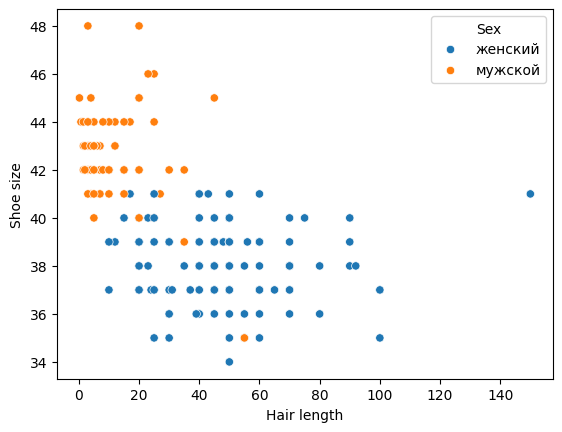

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

df_cut_1 = df[['Hair length','Shoe size', 'Sex']]
df_cut_1 = df_cut_1.dropna()

sns.scatterplot(data=df_cut_1, x='Hair length', y='Shoe size', hue='Sex')

In [ ]:
from sklearn.preprocessing import StandardScaler # для нормирования данных

scaler = StandardScaler()
scaler.fit(df_cut_1[['Hair length', 'Shoe size']].values.reshape(-1, 2))
arr = scaler.transform(df_cut_1[['Hair length', 'Shoe size']].values.reshape(-1, 2))
arr

array([[ 0.61066599,  0.10150035],
       [-1.06881773,  1.17012669],
       [-1.18599101,  0.45770913],
       [-0.56106683, -0.61091721],
       [ 0.8059548 , -1.32333476],
       [-0.36577803,  0.10150035],
       [-0.95164444,  0.81391791],
       [-0.56106683,  2.95117058],
       [-0.36577803,  2.23875302],
       [ 0.41537719, -0.61091721],
       [ 0.61066599, -1.67954354],
       [-1.30316429,  1.52633547],
       [-0.56106683, -0.25470843],
       [ 0.61066599,  0.10150035],
       [-0.17048923,  0.81391791],
       [-0.44389355,  0.10150035],
       [-1.18599101,  1.88254424],
       [-1.28363541,  1.17012669],
       [ 0.61066599, -0.61091721],
       [ 0.22008838, -0.61091721],
       [-0.56106683,  1.88254424],
       [-0.44389355, -0.61091721],
       [ 2.17297643, -0.61091721],
       [-1.06881773,  0.81391791],
       [-0.87352892,  1.52633547],
       [-0.56106683, -0.25470843],
       [-0.17048923, -1.32333476],
       [-1.22504877,  2.95117058],
       [-0.56106683,

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(arr, y=df_cut_1['Sex'].values)

KNeighborsClassifier(n_neighbors=3)

<Axes: xlabel='Hair length', ylabel='Shoe size'>

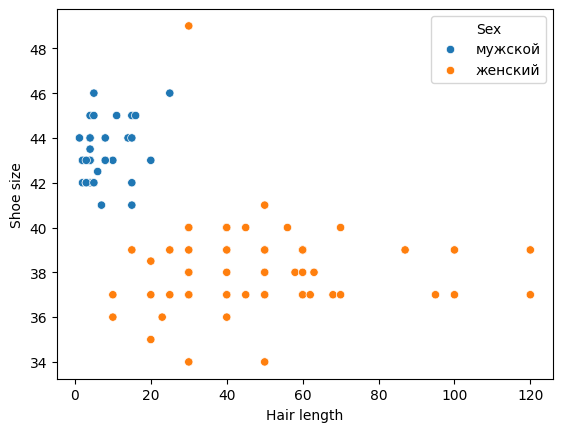

In [ ]:
df_test_cut_1 = df_test[['Hair length','Shoe size', 'Sex']]
df_test_cut_1 = df_test_cut_1.dropna()
sns.scatterplot(data=df_test_cut_1, x='Hair length', y='Shoe size', hue='Sex')

In [ ]:
# модель предсказала пол
arr_test = scaler.transform(df_test_cut_1[['Hair length','Shoe size']].values.reshape(-1, 2))
df_test_cut_1['Predicted sex'] = model.predict(arr_test)
df_test_cut_1.head()

,Hair length,Shoe size,Sex,Predicted sex
0,1.2,44.0,мужской,мужской
1,30.0,38.0,женский,женский
2,50.0,41.0,женский,женский
3,20.0,35.0,женский,женский
4,8.0,44.0,мужской,мужской


In [ ]:
# Матрица смежности показывающая, сколько было угадано верно, сколько ошибочно
pd.crosstab(df_test_cut_1['Predicted sex'], df_test_cut_1['Sex'])

Sex,женский,мужской
Predicted sex,,
женский,61,1
мужской,1,35


<Axes: xlabel='Hair length', ylabel='Shoe size'>

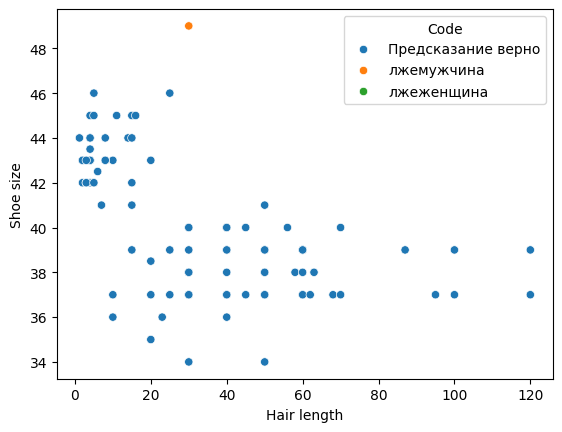

In [ ]:
df_test_cut_1['Code'] = 'Предсказание верно'
df_test_cut_1.loc[(df_test_cut_1['Sex']=='мужской') & (df_test_cut_1['Predicted sex']=='женский'), 'Code'] = 'лжеженщина'
df_test_cut_1.loc[(df_test_cut_1['Sex']=='женский') & (df_test_cut_1['Predicted sex']=='мужской'), 'Code'] = 'лжемужчина'
sns.scatterplot(data=df_test_cut_1, x='Hair length', y='Shoe size', hue='Code')

###Линейная классификация

In [ ]:
from sklearn.linear_model import SGDClassifier

df_cut_2 = df[['Hair length','Shoe size', 'Sex']]
df_cut_2 = df_cut_2.dropna()

<Axes: xlabel='Hair length', ylabel='Shoe size'>

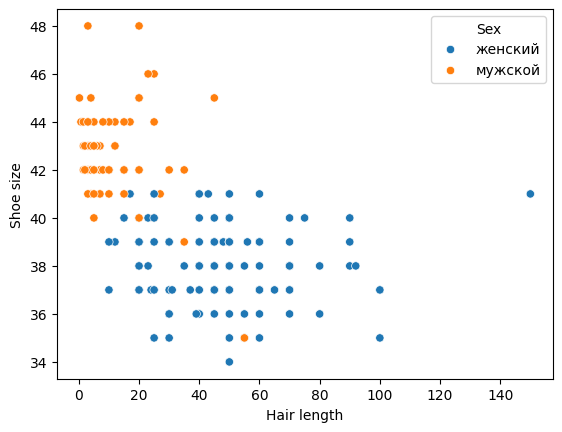

In [ ]:
sns.scatterplot(data=df_cut_2, x='Hair length', y='Shoe size', hue='Sex')

In [ ]:
# Нормируем данные
scaler.fit(df_cut_2[['Hair length', 'Shoe size']].values.reshape(-1, 2))
arr_2 = scaler.transform(df_cut_1[['Hair length', 'Shoe size']].values.reshape(-1, 2))

In [ ]:
SGD_model = SGDClassifier(random_state=0)
SGD_model.fit(arr, y=df_cut_2['Sex'].values)

SGDClassifier(random_state=0)

In [ ]:
df_test_cut_2 = df_test[['Hair length', 'Shoe size', 'Sex']]
df_test_cut_2 = df_test_cut_1.dropna()

arr_test_2 = scaler.transform(df_test_cut_2[['Hair length', 'Shoe size']].values.reshape(-1, 2))
df_test_cut_2['Predicted sex'] = SGD_model.predict(arr_test)
df_test_cut_2.head()

,Hair length,Shoe size,Sex,Predicted sex,Code
0,1.2,44.0,мужской,мужской,Предсказание верно
1,30.0,38.0,женский,женский,Предсказание верно
2,50.0,41.0,женский,женский,Предсказание верно
3,20.0,35.0,женский,женский,Предсказание верно
4,8.0,44.0,мужской,мужской,Предсказание верно


In [ ]:
# Матрица смежности показывающая, сколько было угадано верно, сколько ошибочно
pd.crosstab(df_test_cut_2['Predicted sex'], df_test_cut_2['Sex'])

Sex,женский,мужской
Predicted sex,,
женский,61,1
мужской,1,35


<Axes: xlabel='Hair length', ylabel='Shoe size'>

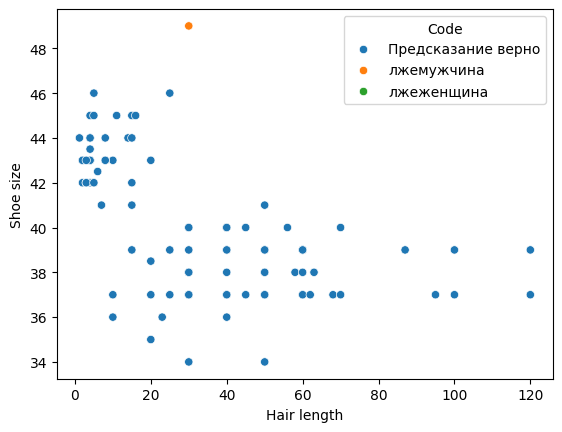

In [ ]:
df_test_cut_2['Code'] = 'Предсказание верно'
df_test_cut_2.loc[(df_test_cut_2['Sex']=='мужской') & (df_test_cut_2['Predicted sex']=='женский'), 'Code'] = 'лжеженщина'
df_test_cut_2.loc[(df_test_cut_2['Sex']=='женский') & (df_test_cut_2['Predicted sex']=='мужской'), 'Code'] = 'лжемужчина'
sns.scatterplot(data=df_test_cut_2, x='Hair length', y='Shoe size', hue='Code')